### 3D (Spherical) Regional mesh, poisson equation

In [1]:
import underworld as uw
import glucifer
import numpy as np

In [4]:
mesh = uw.mesh.FeMesh_SRegion(elementRes=(16,16,10), radialLengths=(3.0,6.0), latExtent=90.0, longExtent=90.0)
tField = mesh.add_variable(nodeDofCount=1)

In [6]:
fig = glucifer.Figure()
# fig.append(glucifer.objects.Mesh(mesh))
fig.append(glucifer.objects.Surface(mesh, tField, onMesh=True))

* MinI_VertexSet / MaxI_VertexSet -> radial walls       : [min/max] = [inner/outer]
* MinJ_VertexSet / MaxJ_VertexSet -> longitudinal walls : [min/max] = [west/east]
* MinK_VertexSet / MaxK_VertexSet -> latitudinal walls  : [min/max] = [south/north]

In [63]:
inner = mesh.specialSets["innerWall_VertexSet"]
outer = mesh.specialSets["outerWall_VertexSet"]
W = mesh.specialSets["westWall_VertexSet"]
E = mesh.specialSets["eastWall_VertexSet"]
S = mesh.specialSets["southWall_VertexSet"]
N = mesh.specialSets["northWall_VertexSet"]

tField.data[inner.data] = 2
tField.data[outer.data] = 1

In [64]:
# set the BCs
tBC = uw.conditions.DirichletCondition( variable=tField, indexSetsPerDof=(inner+outer))
ssSLE = uw.systems.SteadyStateHeat(tField,fn_diffusivity=1.0, fn_heating=1.0, conditions=tBC)

In [45]:
ssSolver = uw.systems.Solver(ssSLE)
ssSolver.solve()

In [46]:
# fig.window()

In [54]:
Tb = 2
Tt = 1
rb = mesh._radialLengths[0]
rt = mesh._radialLengths[1]
f = -1
k = 1

c0 = ( -1.*(Tb - Tt) + 1/6.*k*f*(rb**2-rt**2) ) / (rb**-1 - rt**-1)
c1 = Tt - 1/6.*k*f*rt**2 + c0*rt**-1

r = np.linspace(rb,rt)
T = 1/6.*r**2*k*f - c0*r**-1 + c1

In [55]:
p_x = np.ndarray((20,3))

p_x[:,0] = 0.
p_x[:,1] = 0
p_x[:,2] = np.linspace(rb, rt, 20)

swarm = uw.swarm.Swarm(mesh)

swarm.add_particles_with_coordinates(p_x)

In [58]:
t = tField.evaluate(swarm)

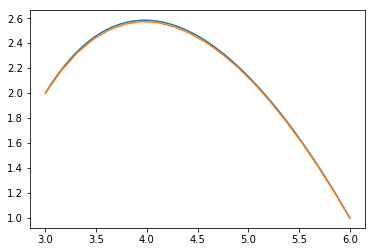

In [59]:
uw.matplotlib_inline()
import matplotlib.pyplot as plt
plt.ion()

plt.plot(r, T, label="analytic")
plt.plot(p_x[:,2], t, label="swarm")